In [2]:
# Importing all the relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Converting into pandas dataframe

df1 = pd.read_csv('/content/Fraudulent_E-Commerce_Transaction_Data.csv')
df2 = pd.read_csv('/content/Fraudulent_E-Commerce_Transaction_Data_2.csv')

In [4]:
# Compiling both the datasets as single dataset

df = pd.concat([df1, df2])

#**Data Wranglings**

In [ ]:
# Shape of dataset

df.shape

(1496586, 16)

In [ ]:
# Checking for null values

df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
# Checking for data imbalance

df['Is Fraudulent'].value_counts()

,count
Is Fraudulent,
0,1421526
1,75060


Therfore we may conclude that his is an imbalanced dataset

In [ ]:
# Checking for data redundancy

df.duplicated().sum()

0

In [ ]:
# Overall checking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496586 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1496586 non-null  object 
 1   Customer ID         1496586 non-null  object 
 2   Transaction Amount  1496586 non-null  float64
 3   Transaction Date    1496586 non-null  object 
 4   Payment Method      1496586 non-null  object 
 5   Product Category    1496586 non-null  object 
 6   Quantity            1496586 non-null  int64  
 7   Customer Age        1496586 non-null  int64  
 8   Customer Location   1496586 non-null  object 
 9   Device Used         1496586 non-null  object 
 10  IP Address          1496586 non-null  object 
 11  Shipping Address    1496586 non-null  object 
 12  Billing Address     1496586 non-null  object 
 13  Is Fraudulent       1496586 non-null  int64  
 14  Account Age Days    1496586 non-null  int64  
 15  Transaction Hour    14

Transaction Date datatype needs to bechanged from str to date time

In [ ]:
# Checking the statistical parameters of dataset

df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06
mean,2.268093e+02,3.000235e+00,3.451284e+01,5.015415e-02,1.796308e+02,1.128663e+01
std,2.705831e+02,1.414814e+00,1.000323e+01,2.182630e-01,1.068726e+02,6.976067e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.862000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


Customer age cant be negative

In [5]:
# Handling the Customer Age variable

print(f"Total rows with age <1 are:   {len(df[df['Customer Age'] < 1])}")

# Filtering out all these rows
df = df[df['Customer Age'] > 1]
print(f"After filtering out shape:  {df.shape}")

Total rows with age <1 are:   439
After filtering out shape:  (1210461, 16)


In [6]:
# Changing the datatype of Transaction Date

print(f"Initial datatype of transaction date was: {df['Transaction Date'].dtypes}")
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
print(f"Final datatype of transaction date is: {df['Transaction Date'].dtypes}")

Initial datatype of transaction date was: object
Final datatype of transaction date is: datetime64[ns]


In [8]:
# Creating year, month columns

df['Transaction Year'] = df['Transaction Date'].dt.year
df['Transaction Month'] = df['Transaction Date'].dt.month

#***EDA- (Exploratory Data Analysis)***

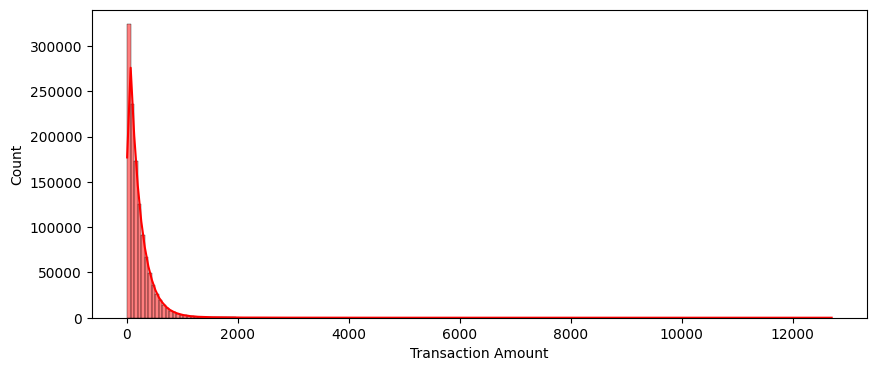

In [27]:
# Plotting histigram

plt.figure(figsize=(10,4))
sns.histplot(df['Transaction Amount'], bins = 200, kde = True, color = 'red')
plt.show()

The figure suggests:


1.   The maximum transaction amount is between 0 and 1000

2.   The data is right-skewed



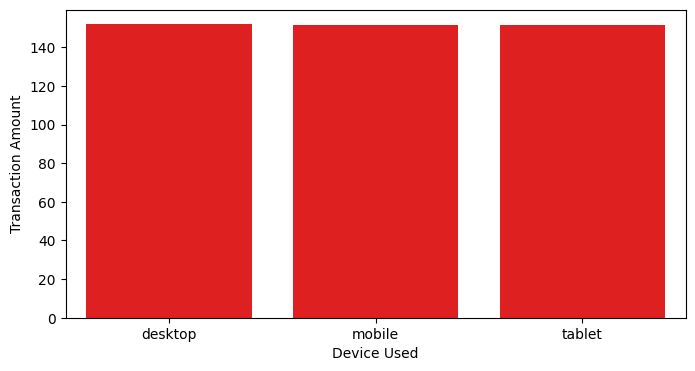

In [78]:
# Plotting bar plot

plt.figure(figsize=(8,4))
a = df.groupby('Device Used')['Transaction Amount'].median().reset_index()
sns.barplot(x = a['Device Used'], y = a['Transaction Amount'], color ='red')
plt.show()

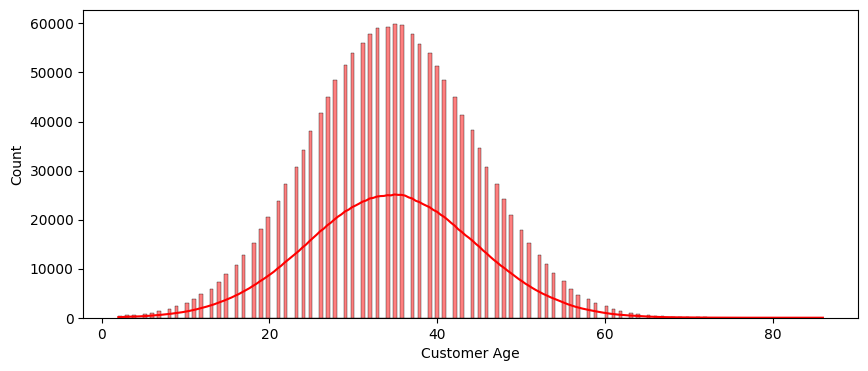

In [80]:
# Plotting Histogram

plt.figure(figsize=(10,4))
sns.histplot(df['Customer Age'], bins = 200, kde = True, color = 'red')
plt.show()

Visualization from the graph:


1.   Customer Age data is normally distributed
2.   Maximum customers buying from E-Commerce platform comes under the age (30-40)



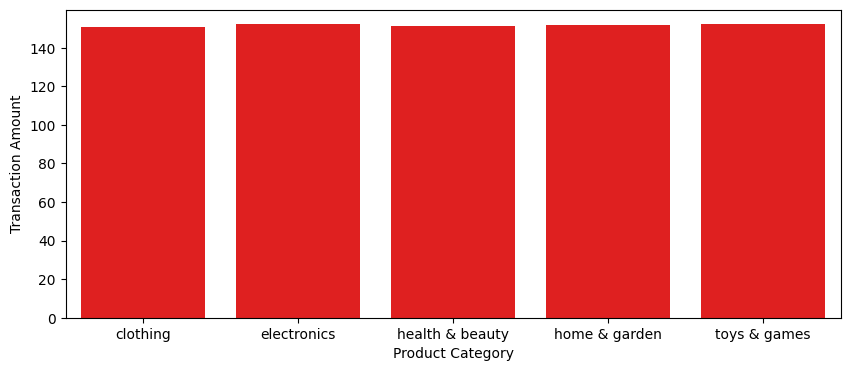

In [15]:
# plotting Bar plot

b = df.groupby('Product Category')['Transaction Amount'].median().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x = b['Product Category'], y = b['Transaction Amount'], color = 'red')
plt.show()

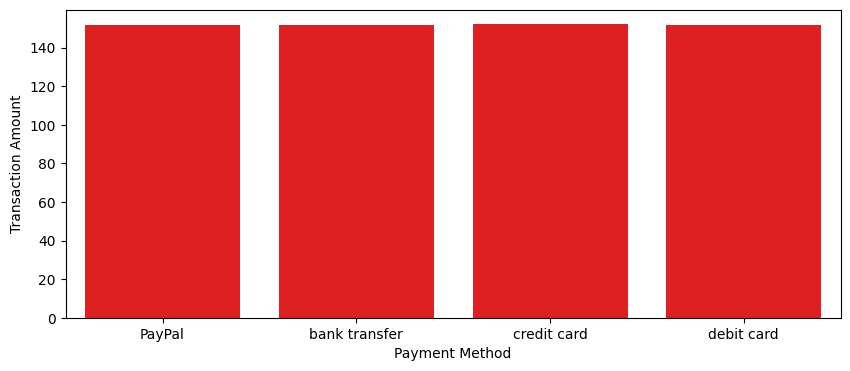

In [17]:
# Plotting bar plot

c = df.groupby('Payment Method')['Transaction Amount'].median().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x = c['Payment Method'], y = c['Transaction Amount'], color = 'red')
plt.show()

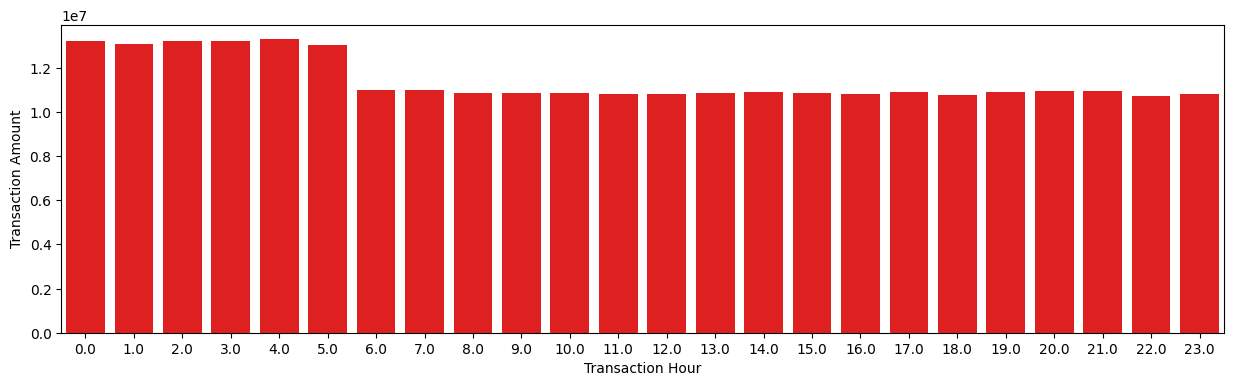

In [26]:
# Plotting bar plot

d = df.groupby('Transaction Hour')['Transaction Amount'].sum().reset_index()
plt.figure(figsize=(15,4))
sns.barplot(x = d['Transaction Hour'], y = d['Transaction Amount'], color = 'red')
plt.show()

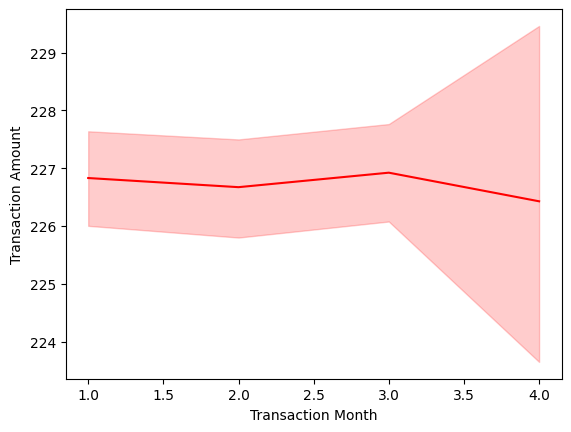

In [28]:
# plotting line plot

sns.lineplot(x = df['Transaction Month'], y = df['Transaction Amount'], color = 'red')
plt.show()

The above lineplot shows the data of transaction amount monthly (January - April)


1.   March Peak: The highest transaction amounts occur in March.

2.   April Bottom: The transaction amounts drop to their lowest in April.



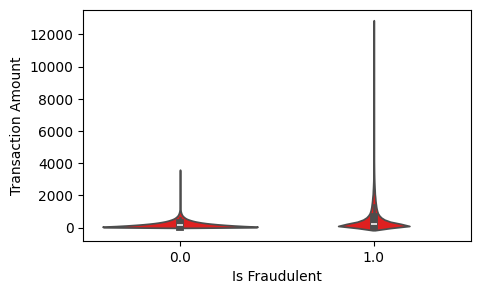

In [30]:
# Violin plot

plt.figure(figsize=(5,3))
sns.violinplot(x = df['Is Fraudulent'], y = df['Transaction Amount'], color = 'red')
plt.show()

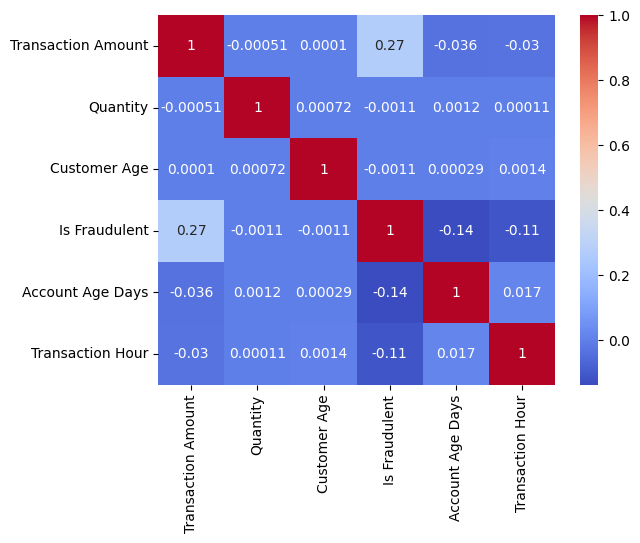

In [ ]:
# Creating co-relation graph

num_features = df[['Transaction Amount',	'Quantity',	'Customer Age',	'Is Fraudulent',	'Account Age Days',	'Transaction Hour']]

sns.heatmap(num_features.corr(), annot = True, cmap = 'coolwarm')
plt.show()


Hardly we can find any co-relation between dependnt and independent variable

<ipython-input-13-d2672d257aed>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


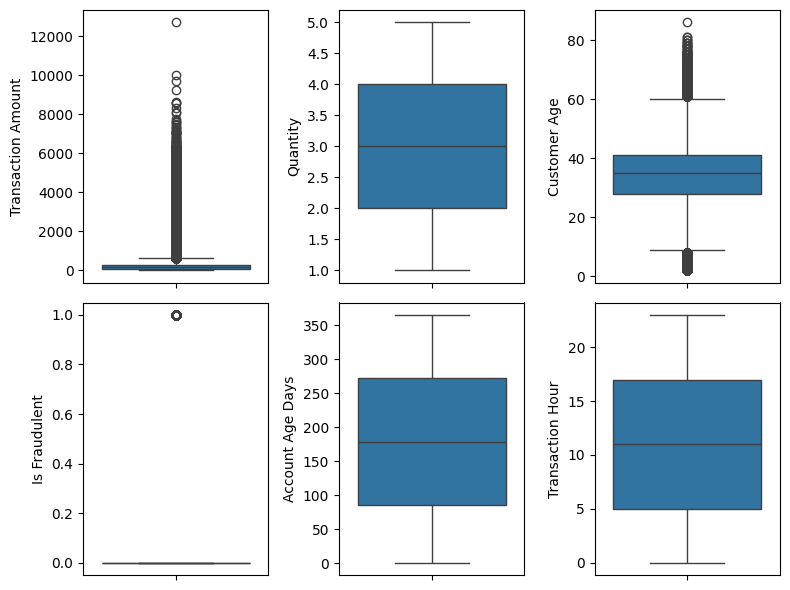

In [ ]:
# checking for outliers

f, ax = plt.subplots(figsize =(8, 6))

plt.subplot(2,3,1)
sns.boxplot(num_features['Transaction Amount'])

plt.subplot(2,3,2)
sns.boxplot(num_features['Quantity'])

plt.subplot(2,3,3)
sns.boxplot(num_features['Customer Age'])

plt.subplot(2,3,4)
sns.boxplot(num_features['Is Fraudulent'])

plt.subplot(2,3,5)
sns.boxplot(num_features['Account Age Days'])

plt.subplot(2,3,6)
sns.boxplot(num_features['Transaction Hour'])


plt.tight_layout()
plt.show()

In [ ]:
# Handling outliers

# Calculate the lower and upper bounds
lower_bound = num_features[['Transaction Amount', 'Customer Age']].quantile(0.01)
upper_bound = num_features[['Transaction Amount', 'Customer Age']].quantile(0.95)

# Cap values below the lower bound and above the upper bound
for i in ['Transaction Amount', 'Customer Age']:
    num_features.loc[num_features[i] < lower_bound[i], i] = lower_bound[i]
    num_features.loc[num_features[i] > upper_bound[i], i] = upper_bound[i]


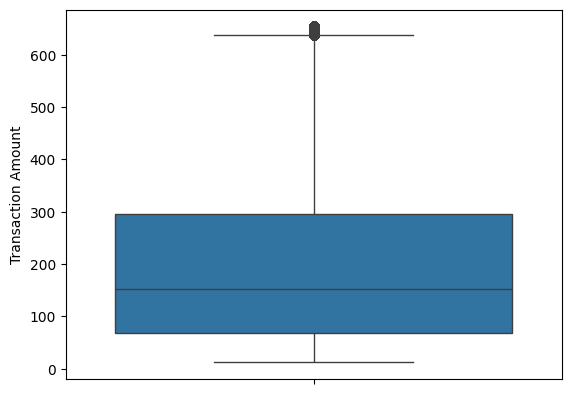

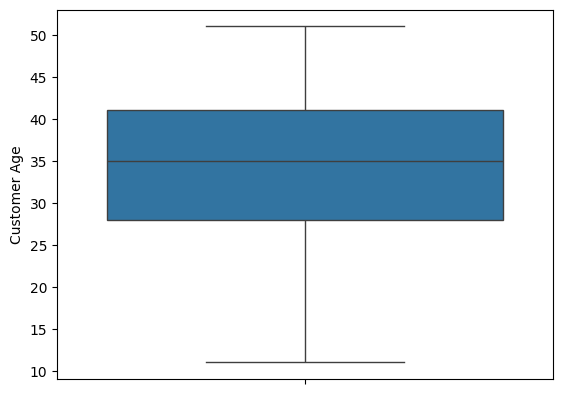

In [ ]:
for i in ['Transaction Amount', 'Customer Age']:
  sns.boxplot(num_features[i])
  plt.show()

#***🛠️Model Building & Training🛠️***

In [ ]:
# Creating dependent and independent features

x = num_features[['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']]
y = num_features['Is Fraudulent']

#***Using simple Logistic Regression***

In [ ]:
# Importing all the relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [ ]:
# Train Test split 5:1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
classifier = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
# Parameters

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.9498407244114492
Confusion Matrix: 
 [[284161      0]
 [ 15006      0]]
ROC-AUC Curve: 
 0.5


Since accuracy is very high and ROC_AUC is very low so the parameters are misleading.

#**Handling Imbalanced data by SMOTE**

In [ ]:
# Importing library for SMOTE

from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
y_smote.value_counts()

,count
Is Fraudulent,
0,1420805
1,1420805


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [ ]:
classifier = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))
classifier.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.7014738123810094
Confusion Matrix: 
 [[201218  82943]
 [ 86716 197445]]
ROC-AUC Curve: 
 0.7014738123810094


Accuracy improved in logistic regression by using SMOTE

#***MODEL - 2 Decision Tree***

In [ ]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=5,  # Limit tree depth
        min_samples_split=10,  # Minimum samples required to split
        min_samples_leaf=5,  # Minimum samples required at a leaf node
        max_leaf_nodes=20,  # Maximum leaf nodes
        random_state=42
    )
)

In [ ]:
# Fit the classifier with training data
classifier.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20,
                                        min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.764130193798586
Confusion Matrix: 
 [[213884  70277]
 [ 63773 220388]]
ROC-AUC Curve: 
 0.7641301937985859


Decision tree is showcasing better accuracy than Logistic regression

#***MODEL - 3 XGBoost***

In [ ]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42, stratify = y_smote)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_classifier = make_pipeline(StandardScaler(), XGBClassifier(random_state=42))

In [ ]:
# Fit the RandomizedSearchCV
xgb_classifier.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Predict on the test set with the best model

y_npred = xgb_classifier.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.773088730215148
Confusion Matrix: 
 [[332361  93881]
 [ 99557 326684]]
ROC-AUC Curve: 
 0.7730887224044779


#***MODEL - 4 Random Forest***

In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifier = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Define the parameter grid
#param_dist = {
    #'randomforestclassifier__n_estimators': [50, 100],  # 3 options
    #'randomforestclassifier__max_depth': [5, 7],         # 3 options
    #'randomforestclassifier__max_features': [0.8, 1.0],     # 2 options
    #'randomforestclassifier__min_samples_split': [2, 5]     # 2 options
#}

# Initialize GridSearchCV
#random_search = RandomizedSearchCV(estimator=classifier,
    #param_distributions=param_dist,
    #n_iter=3,  # Number of parameter settings that are sampled
    #scoring='roc_auc',
    #cv=2,
    #n_jobs=-1,
    #verbose=1,
    #random_state=42
#)

In [ ]:
# Fit the object to train dataset
classifier.fit(x_train, y_train)          # Using GridSearchCV computational time was more than 5 hours
                                          # Using RandomizedSearchCV computational time reduced but accuracy also reduced due to less hyperparameter options

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.9142880268580136
Confusion Matrix: 
 [[254486  29675]
 [ 19037 265124]]
ROC-AUC Curve: 
 0.9142880268580136


#***MODEL - 5 Artificial Neural Network***

In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeUniform, GlorotUniform

In [ ]:
# Initialize the ANN
classifier = Sequential()  # This initializes the sequential model for adding layers

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu', input_dim=5))  # input_dim is required for the first layer

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer=GlorotUniform(), activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocessing with StandardScaler
scaler = StandardScaler()

# Scale the training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fit the ANN to the training set
classifier.fit(x_train_scaled, y_train, batch_size=10, epochs=10)

Epoch 1/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 352s 2ms/step - accuracy: 0.7600 - loss: 0.5042
Epoch 2/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 387s 2ms/step - accuracy: 0.7605 - loss: 0.5034
Epoch 3/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 368s 2ms/step - accuracy: 0.7607 - loss: 0.5022
Epoch 4/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 345s 2ms/step - accuracy: 0.7607 - loss: 0.5017
Epoch 5/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 394s 2ms/step - accuracy: 0.7610 - loss: 0.5017
Epoch 6/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 376s 2ms/step - accuracy: 0.7612 - loss: 0.5017
Epoch 7/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 349s 2ms/step - accuracy: 0.7608 - loss: 0.5018
Epoch 8/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 379s 2ms/step - accuracy: 0.7613 - loss: 0.5013
Epoch 9/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 344s 2ms/step - accuracy: 0.7610 - loss: 0.5019
Epoch 10/10
227329/227329 ━━━━━━━━━━━━━━━━━━━━ 341s 1ms/step - accuracy: 0.7612 - loss: 0.5016


In [ ]:
# Predicting the test set results
y_pred = classifier.predict(x_test_scaled)

17761/17761 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


In [ ]:
y_test.values

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_npred = []

for i in y_pred:
  if i < 0.5:
    y_npred.append(0)
  else:
    y_npred.append(1)

print(y_npred)

[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 

In [ ]:
acc = accuracy_score(y_test, y_npred)
cm = confusion_matrix(y_test, y_npred)
roc = roc_auc_score(y_test, y_npred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.7620046382156594
Confusion Matrix: 
 [[214553  69608]
 [ 65650 218511]]
ROC-AUC Curve: 
 0.7620046382156594


#***Conclusion***

The **logistic regression** model without SMOTE achieved a high accuracy of 0.95 but was unable to classify the minority class, as indicated by the confusion matrix and the ROC-AUC score of 0.5. This suggests that the model suffers from severe class imbalance and fails to generalize well to the minority class.

After applying SMOTE to balance the classes, the performance of **logistic regression** significantly improved, with an accuracy of 0.70 and a corresponding ROC-AUC of 0.70. The confusion matrix shows a more balanced classification between the majority and minority classes, though there is still room for improvement.

The **Decision Tree** model with SMOTE yielded a higher accuracy of 0.76 and a similar ROC-AUC score of 0.76, indicating better classification performance compared to logistic regression. The model shows improved handling of the minority class, but still has some misclassification issues.

**XGBoost** with SMOTE further enhanced the accuracy to 0.77 and achieved an equivalent ROC-AUC score of 0.77, demonstrating robust performance in handling class imbalance and delivering consistent predictions across both classes.

The **Random Forest** model with SMOTE demonstrated the best overall performance, with an accuracy of 0.91 and an ROC-AUC of 0.91. It shows a good balance between precision and recall, significantly reducing misclassification rates for both classes, making it the most effective model in this comparison.

The **ANN** model with SMOTE yielded an accuracy of 0.76 and an ROC-AUC score of 0.76, comparable to the Decision Tree model. While it effectively handled class imbalance to some extent, it was not as effective as Random Forest and XGBoost.

In conclusion, the ***Random Forest*** model with SMOTE emerged as the most accurate and reliable model for this dataset, effectively addressing the class imbalance issue and outperforming the other models in terms of both accuracy and ROC-AUC score.